In [5]:
!pip install keras

!pip install tensorflow --upgrade

!pip install seaborn



[notice] A new release of pip is available: 24.0 -> 24.2
[notice] To update, run: python.exe -m pip install --upgrade pip



[notice] A new release of pip is available: 24.0 -> 24.2
[notice] To update, run: python.exe -m pip install --upgrade pip


   ---------------------------------------- 0.0/294.9 kB ? eta -:--:--
   ---- ---------------------------------- 30.7/294.9 kB 660.6 kB/s eta 0:00:01
   ---------------- ----------------------- 122.9/294.9 kB 1.8 MB/s eta 0:00:01
   ---------------------------------------- 294.9/294.9 kB 3.0 MB/s eta 0:00:00



[notice] A new release of pip is available: 24.0 -> 24.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from keras.models import Sequential
from keras.layers import Dense

In [38]:
# Load dataset
car_df = pd.read_csv("C:\\Users\\hemal\\OneDrive\\Desktop\\car-sales-prediction\\customer_data_linear_regression.csv")

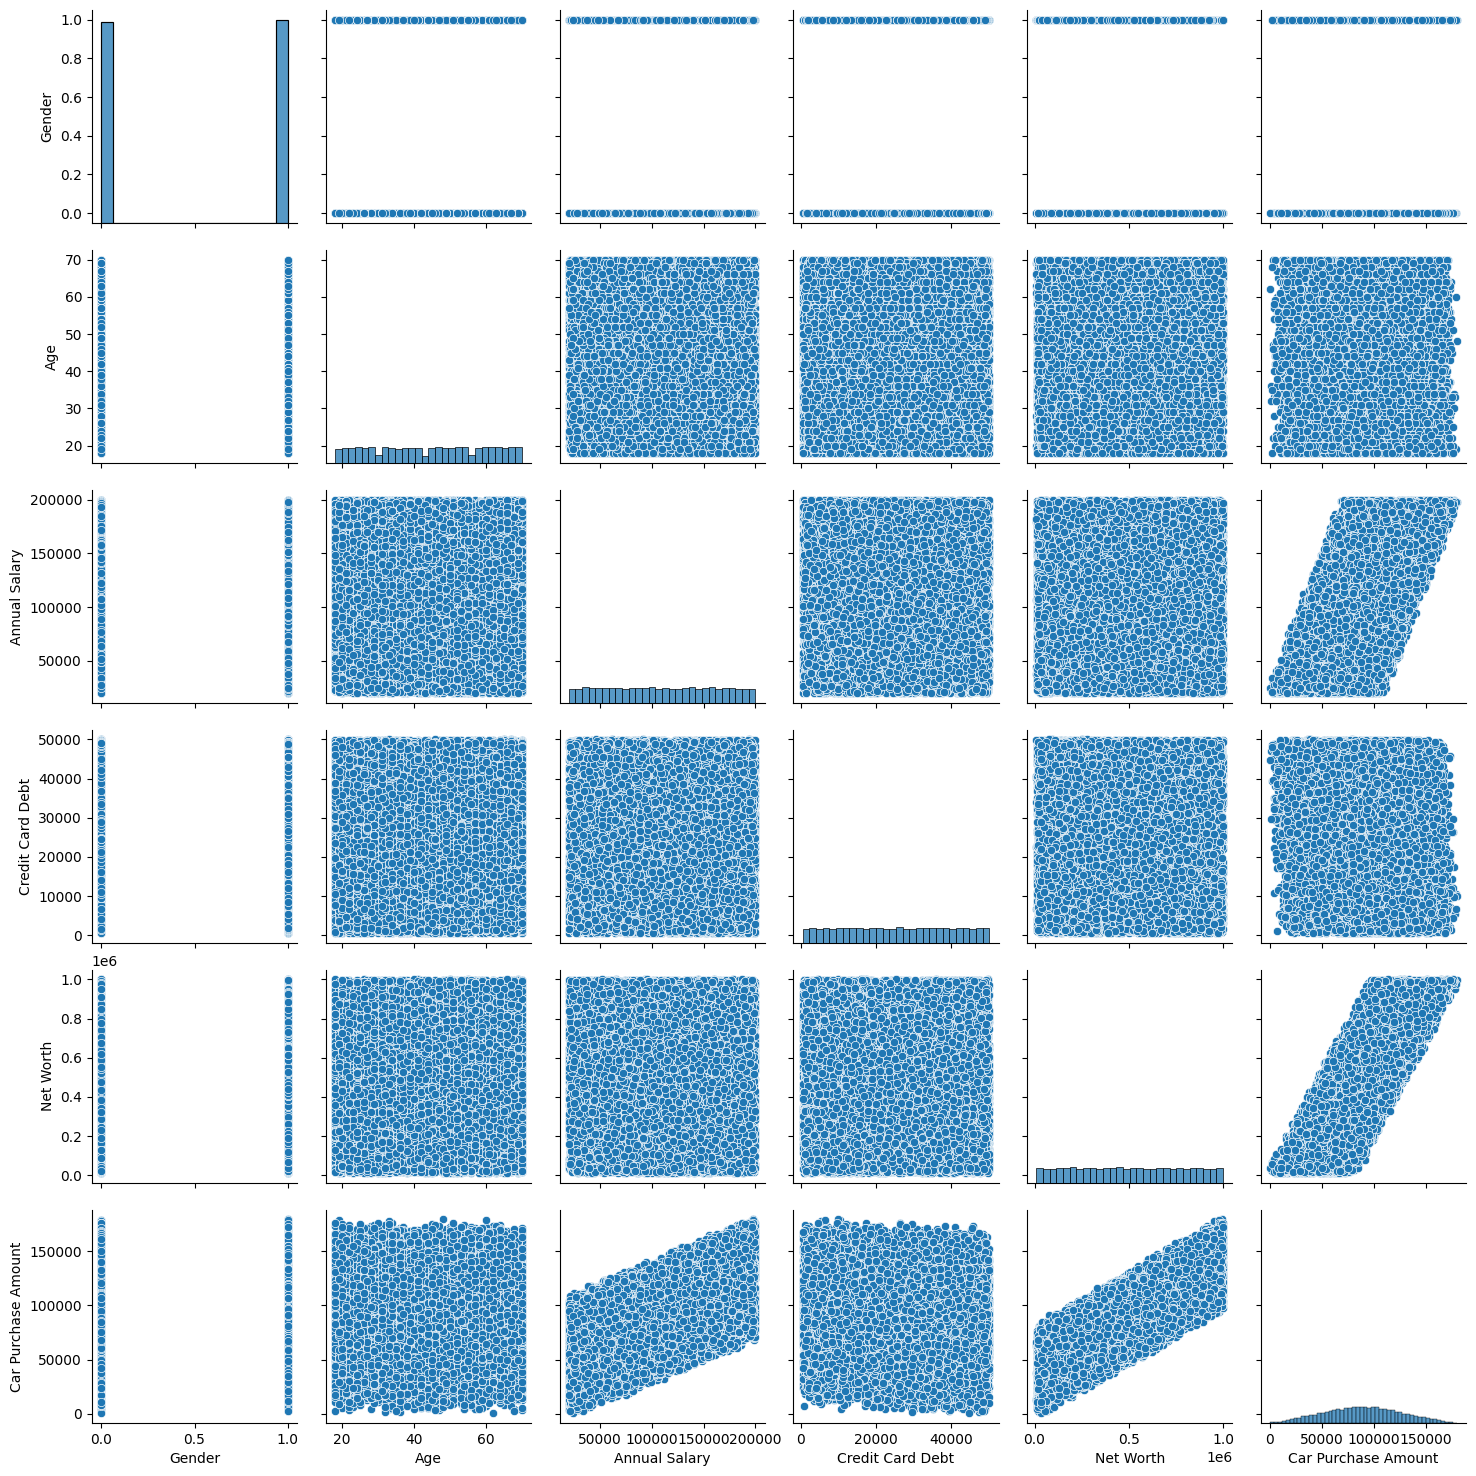

In [39]:
# Visualize data
sns.pairplot(car_df)

In [40]:
# Prepare the input features (X) and target (y)
X = car_df.drop(['Customer Name', 'Customer e-mail', 'Country', 'Car Purchase Amount'], axis=1)

In [41]:
X

,Gender,Age,Annual Salary,Credit Card Debt,Net Worth
0,1,50,182684.90,34645.13,533626.81
1,1,28,128744.67,11697.48,382719.01
2,1,67,97718.24,24879.30,431573.40
3,0,46,31946.46,15920.06,237228.30
4,0,51,179833.56,31473.51,543475.62
...,...,...,...,...,...
19995,1,24,169662.48,48546.61,441383.33
19996,1,67,37661.49,5510.95,926169.11
19997,0,61,118491.44,28854.35,673013.58
19998,0,63,122667.87,11036.67,952350.08


In [42]:
y = car_df['Car Purchase Amount']

In [43]:
y

0        114700.15
1         89977.28
2         80864.04
3         31644.04
4        121602.13
           ...    
19995    107011.90
19996    107286.31
19997    107285.88
19998    140197.26
19999     48305.57
Name: Car Purchase Amount, Length: 20000, dtype: float64

In [44]:
car_df['Gender'] = car_df['Gender'].map({'Female': 1, 'Male': 0})

print(car_df)

          Customer Name            Customer e-mail         Country  Gender  \
0      Jennifer Morales  kristinweaver@example.com         Germany     NaN   
1        Michael Wilson       hicksjon@example.net          Brazil     NaN   
2       Jennifer Fisher    brandikelly@example.com          Mexico     NaN   
3           Nancy Jones        jenna87@example.org         Germany     NaN   
4        James Harrison     brettkelly@example.com          Brazil     NaN   
...                 ...                        ...             ...     ...   
19995    Colleen Madden       andrea19@example.net           India     NaN   
19996        Kiara Park   hughesandrea@example.org           India     NaN   
19997    Frank Mckinney  fernandobaker@example.org   United States     NaN   
19998      Amanda Carey    conleyjacob@example.net  United Kingdom     NaN   
19999     Rebecca Chang   ronaldingram@example.net   United States     NaN   

       Age  Annual Salary  Credit Card Debt  Net Worth  Car Pur

In [45]:
# Reshape the target variable and scale both X and y
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)
y = y.values.reshape(-1, 1)  # Reshape y into a 2D array
y_scaled = scaler.fit_transform(y)

In [46]:
X_scaled

array([[1.        , 0.61538462, 0.90382529, 0.68979899, 0.52889394],
       [1.        , 0.19230769, 0.60413868, 0.22620467, 0.37645326],
       [1.        , 0.94230769, 0.43175889, 0.49250718, 0.4258039 ],
       ...,
       [0.        , 0.82692308, 0.54717274, 0.57281217, 0.66969656],
       [0.        , 0.86538462, 0.57037658, 0.21285482, 0.95187047],
       [1.        , 0.71153846, 0.39767282, 0.97900238, 0.18001469]])

In [47]:
y_scaled

array([[0.63775251],
       [0.49948317],
       [0.44851491],
       ...,
       [0.5962862 ],
       [0.78035199],
       [0.26642286]])

In [48]:
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y_scaled, test_size=0.25)

In [49]:
# Build the neural network model
model = Sequential()
model.add(Dense(25, input_dim=5, activation='relu'))  # First hidden layer
model.add(Dense(25, activation='relu'))               # Second hidden layer
model.add(Dense(1, activation='linear'))              # Output layer

c:\Users\hemal\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [50]:
# Model summary
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_3 (Dense)                 │ (None, 25)             │           150 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 25)             │           650 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 1)              │            26 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 826 (3.23 KB)

 Trainable params: 826 (3.23 KB)

 Non-trainable params: 0 (0.00 B)

In [51]:
# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

In [52]:
# Train the model
epochs_hist = model.fit(X_train, y_train, epochs=50, batch_size=32, verbose=1, validation_split=0.2)

Epoch 1/50
375/375 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 0.0706 - val_loss: 5.1633e-04
Epoch 2/50
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 4.9973e-04 - val_loss: 3.9249e-04
Epoch 3/50
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 3.9290e-04 - val_loss: 3.4534e-04
Epoch 4/50
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 3.4349e-04 - val_loss: 3.3665e-04
Epoch 5/50
375/375 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 3.1306e-04 - val_loss: 3.0194e-04
Epoch 6/50
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 3.0729e-04 - val_loss: 3.0318e-04
Epoch 7/50
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 2.8883e-04 - val_loss: 3.0054e-04
Epoch 8/50
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 2.9198e-04 - val_loss: 2.9375e-04
Epoch 9/50
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 2.8581e-04 - val_loss: 2.9536e-04
Epoch 10/50
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 2.9009e-04 - val_loss: 3.3011e-04
Epoch 11/50
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 2.

In [53]:
epochs_hist.history.keys()

dict_keys(['loss', 'val_loss'])

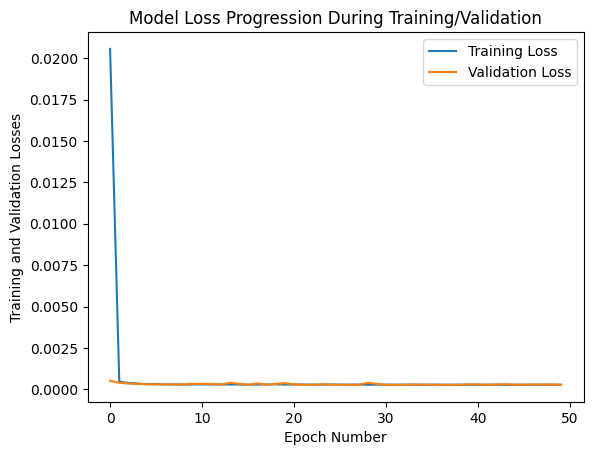

In [54]:
# Plot training and validation loss
plt.plot(epochs_hist.history['loss'])
plt.plot(epochs_hist.history['val_loss'])
plt.title('Model Loss Progression During Training/Validation')
plt.ylabel('Training and Validation Losses')
plt.xlabel('Epoch Number')
plt.legend(['Training Loss', 'Validation Loss'])
plt.show()

In [55]:
# Predict car purchase amounts for the test set
y_predict = model.predict(X_test)

157/157 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


In [57]:
y_predict

array([[0.24817978],
       [0.61454296],
       [0.5654981 ],
       ...,
       [0.4403054 ],
       [0.6686084 ],
       [0.60710585]], dtype=float32)

In [58]:
# Rescale the predicted values and actual values back to original scale
y_predict_rescaled = scaler.inverse_transform(y_predict)
y_test_rescaled = scaler.inverse_transform(y_test)

In [59]:
y_predict_rescaled

array([[ 45043.664],
       [110550.234],
       [101780.91 ],
       ...,
       [ 79396.164],
       [120217.26 ],
       [109220.46 ]], dtype=float32)

In [60]:
y_test_rescaled

array([[ 47851.94],
       [111406.01],
       [ 98525.44],
       ...,
       [ 82232.  ],
       [122904.57],
       [107608.52]])

In [61]:
# Print the first 5 predicted vs actual values
for i in range(5):
    print(f"Predicted: {y_predict_rescaled[i][0]}, Actual: {y_test_rescaled[i][0]}")

Predicted: 45043.6640625, Actual: 47851.94
Predicted: 110550.234375, Actual: 111406.01
Predicted: 101780.90625, Actual: 98525.44
Predicted: 91897.9375, Actual: 96961.85
Predicted: 117551.84375, Actual: 119087.71000000002


In [62]:
# Calculate accuracy using Mean Squared Error and R-squared
mse = mean_squared_error(y_test_rescaled, y_predict_rescaled)
r2 = r2_score(y_test_rescaled, y_predict_rescaled)

In [63]:
print(f"Mean Squared Error: {mse}")
print(f"R-Squared: {r2}")

Mean Squared Error: 8669969.785025885
R-Squared: 0.9931724421394185


In [58]:
# Predict a new car purchase amount based on a sample input
X_Testing = np.array([[1, 50, 50000, 10985, 629312]])  # Gender, Age, Annual Salary, Credit Card Debt, Net Worth
y_predict_sample = model.predict(X_Testing)
print('Expected Purchase Amount (Scaled) =', y_predict_sample[0][0])

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step
Expected Purchase Amount (Scaled) = 159445.66


In [59]:
# Rescale the sample prediction back to the original value
y_predict_sample_rescaled = scaler.inverse_transform(y_predict_sample)
print('Expected Purchase Amount (Original Scale) =', y_predict_sample_rescaled[0][0])

Expected Purchase Amount (Original Scale) = 15145035000.0


In [60]:
import pickle

# Assuming your model is named 'model'
with open('model.pkl', 'wb') as file:
    pickle.dump(model, file)